In [1]:
# List all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer

In [2]:
# load and check the data 
data = pd.read_csv('consumer-complaints-QueryResult-notnull-8000.csv')

In [4]:
data.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
0,2016-11-18,Mortgage,Conventional fixed mortgage,Settlement process and costs,NaN,Started the refinance of home mortgage process...,NaN,AMERICAN NEIGHBORHOOD MORTGAGE,NJ,088XX,NaN,Consent provided,Web,2016-11-21,Closed with monetary relief,False,No,2216206
1,2017-03-04,Bank account or service,Checking account,"Account opening, closing, or management",NaN,My wife and I visited the Chase Bank branch at...,NaN,JPMORGAN CHASE & CO.,KY,423XX,NaN,Consent provided,Web,2017-03-04,Closed with explanation,True,Yes,2371744
2,2017-03-04,Student loan,Federal student loan servicing,Can't repay my loan,Can't decrease my monthly payments,The service representative was harsh and not l...,NaN,"Navient Solutions, LLC.",OK,741XX,NaN,Consent provided,Web,2017-03-04,Closed with explanation,True,No,2371928
3,2017-04-12,Bank account or service,Checking account,Problems caused by my funds being low,NaN,I have documentation that shows that US Bank w...,Company has responded to the consumer and the ...,U.S. BANCORP,CA,928XX,NaN,Consent provided,Web,2017-04-12,Closed with explanation,True,No,2431565
4,2017-03-21,Credit reporting,NaN,Incorrect information on credit report,Account status,Experian reporting of XXXX XXXX reflects a for...,Company has responded to the consumer and the ...,EXPERIAN DELAWARE GP,PA,190XX,NaN,Consent provided,Web,2017-03-21,Closed with explanation,True,No,2398200


In [5]:
# Now take only the required columns
df = data[['product', 'consumer_complaint_narrative']]

In [6]:
# check one detailed narrative
df['consumer_complaint_narrative'][1]

'My wife and I visited the Chase Bank branch at XXXX, XXXX, KY on XX/XX/2017 around XXXX AM to open new checking accounts. We were prompted to open these checking accounts because Chase mailed and emailed us vouchers to receive {$300.00} for opening each account and personal friends had also referred us. XXXX was assigned to assist us in this matter. His first question to us was " where do you work? ". After informing him that we are both were XXXX employees he asked us what we were going to do with our XXXX accounts. We advised him we would be keeping those accounts open. He then asked what we would be using our new Chase accounts for and I advised we would be using those accounts for miscellaneous savings, etc. It was then that XXXX XXXX advised he would not be opening the new accounts for us unless we closed our XXXX accounts and he tossed the Chase Voucher and our ID \'s back across the desk to us ( RUDE! ). Confused, I questioned him further about this and he advised that he did n

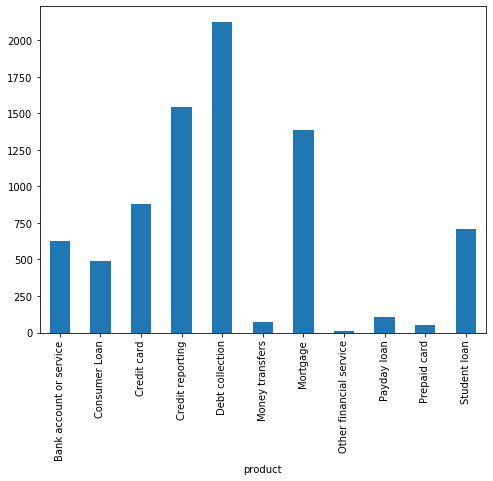

In [7]:
# check the count of the products
# Now we need to visualize the whole date set
fig = plt.figure(figsize = (8,6))
df.groupby('product').consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [8]:
# load Text Pre-processing modules
lemmatizer = WordNetLemmatizer()
tokenizer = WhitespaceTokenizer()
stemmer = PorterStemmer()

In [9]:
# Text Processing Tasks:
# Lemmatization
def lemmatize_text(text):
    sent=""
    for w in tokenizer.tokenize(text):
        sent = sent + " "+ lemmatizer.lemmatize(w,'v')
    return sent

In [10]:
# Stemming
def stem_text(text):
    sent=""
    for w in tokenizer.tokenize(text):
        sent = sent + " "+ stemmer.stem(w)
    return sent

In [11]:
# Lemmatize the issues
df['issue_lemmatized'] = df.consumer_complaint_narrative.apply(lemmatize_text)

G:\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
# Stemming the lemmatized issues
df['issue_lemmatized_stemmed'] = df.issue_lemmatized.apply(stem_text)

G:\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
# remove the stop words
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS.union(["XXXX","xxxx", "wu"]) # added this after seeing XXXX in the text

In [15]:
# Extract the features from the text
# we are restricting the total # of features upto 15k
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf = TfidfVectorizer(min_df = 5, lowercase=True,sublinear_tf=True, max_features=15000, stop_words=my_stop_words, ngram_range=(1,2))
features = tfidf.fit_transform(df['issue_lemmatized_stemmed']).toarray()


In [16]:
features.shape # we are having 15k features to work with

(8000, 15000)

In [17]:
# creating a dictionary out of the product and numeric category value
df['product_id'] = df['product'].factorize()[0]
df_prod_id  = df[['product','product_id']].drop_duplicates()
product_to_id = dict(df_prod_id.values)

G:\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
# Check the associated words to a particular category
# this is a data exploarion step
# now check the word affiliation with the category with chi2 value
from sklearn.feature_selection import chi2

labels = df.product_id
N = 4
for product, cat_id in product_to_id.items():
    features_chi2 = chi2(features,labels == cat_id )
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print(product)
    print(unigrams[-N:])
    print(bigrams[-N:])

Mortgage
['home', 'escrow', 'modif', 'mortgag']
['mortgag compani', 'short sale', 'mortgag payment', 'loan modif']
Bank account or service
['branch', 'bank', 'overdraft', 'deposit']
['deposit check', 'debit card', 'overdraft fee', 'check account']
Student loan
['repay', 'school', 'student', 'navient']
['privat student', 'privat loan', 'loan navient', 'student loan']
Credit reporting
['transunion', 'report', 'experian', 'equifax']
['experian credit', 'equifax credit', 'equifax report', 'credit report']
Credit card
['visa', 'reward', 'chase', 'card']
['thi card', 'card compani', 'american express', 'credit card']
Debt collection
['recoveri', 'collector', 'collect', 'debt']
['debt collector', 'collect agenc', 'collect debt', 'thi debt']
Consumer Loan
['dealership', 'vehicle', 'vehicl', 'car']
['financ compani', 'american honda', 'auto loan', 'car loan']
Other financial service
['exclud', 'offset', 'guard', 'telecheck']
['number check', 'money order', 'order money', 'tri cancel']
Money tra

In [19]:
# Now that our pre processing is done: start building our classifier
# start building our classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['consumer_complaint_narrative'], df['product'], test_size = 0.15 , 
                                                    random_state=0)


In [24]:
# fit tfidf with the training data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [25]:
# check the number of features for both of these
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(6800, 15000)
(1200, 15000)


In [ ]:
# Now we will implement sevral classification algorithm and choose the best performing one

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

classifier_logistic = LogisticRegression(random_state=0, solver='lbfgs',max_iter=250,C=2,penalty='l2')
classifier_logistic.fit(X_train_tfidf,y_train)
y_pred_logistic = classifier_logistic.predict(X_test_tfidf)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(accuracy_logistic)

0.83


In [27]:
# SVM
from sklearn.svm import LinearSVC
classifier_svc = LinearSVC(max_iter=1500,C=2)
classifier_svc.fit(X_train_tfidf,y_train)
y_pred_svc = classifier_svc.predict(X_test_tfidf)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(accuracy_svc)

0.8308333333333333


In [28]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth=3, n_estimators=200, random_state=0)
classifier_rf.fit(X_train_tfidf,y_train)
y_pred_rf = classifier_rf.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(accuracy_rf)

0.3541666666666667


In [29]:
# XGBoost
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(n_estimators=250)
xgb_classifier.fit(X_train_tfidf,y_train)
y_pred_xgb = xgb_classifier.predict(X_test_tfidf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(accuracy_xgb)


0.8116666666666666


In [ ]:
print(xgb_classifier.predict(tfidf.transform(['my wife and i visited the chase bank branch at xxxx, xxxx, ky on xx/xx/2017 around xxxx am to open new checking accounts. we were prompted to open these checking accounts because chase mailed and emailed us vouchers to receive {$300.00} for opening each account and personal friends had also referred us. xxxx was assigned to assist us in this matter. his first question to us was " where do you work? ". after informing him that we are both were xxxx employees he asked us what we were going to do with our xxxx accounts. we advised him we would be keeping those accounts open. he then asked what we would be using our new chase accounts for and i advised we would be using those accounts for miscellaneous savings, etc. it was then that xxxx xxxx advised he would not be opening the new accounts for us unless we closed our xxxx accounts and he tossed the chase voucher and our id \'s back across the desk to us ( rude! ). confused, i questioned him further about this and he advised that he did not believe we were going to use our new chase accounts and would just close them in 6 months. upon clarifying that we would indeed keep the chase accounts open and meet all of the requirements of the offer he stated that we would not be closing our xxxx accounts. he reiterated that he would not open the accounts for us and advised that he would get his manager xxxx involved. when xxxx xxxx arrived in the office to speak with us she advised that chase would not be honoring the vouchers and would not open accounts for us because xxxx xxxx told her we were not planning to keep the accounts open and would not be " using \'\' the accounts. i advised xxxx xxxx that we intended to meet the minimum requirements ( set up direct deposit and keep the account open for 6 months ) and would keep the accounts open further if we enjoyed the service we received from chase during that time. i advised we intended to have direct deposit active on the accounts and would be moving money in and out of the accounts, but she did not seem to believe that was qualifying usage of the accounts. she then advised that i had previously opened a chase account with a coupon about 10 years ago and did not keep it open. however, i believe that account was my primary checking account and i did keep it open for the required period of time and more. it was only when i moved out of state that i closed the account because i did not know if there would be chase branches in my new area. i am deeply insulted by my experience in trying to open these new accounts and feel that my wife and i have been discriminated against because of our employment with another banking institute. in addition to this occurrence while my wife and i we waiting in the lobby to meet with xxxx xxxx we both were able to clearly observe xxxx \'s business interactions with another customer who was in his cubicle/office which has an open door and clear glass windows. we were able to hear their entire conversation and at a certain point xxxx xxxx pulled that customer \'s xxxx score. after pulling the xxxx score up on his monitor he swiveled the monitor around so that it was facing directly out the window into the lobby and i could clearly see the customer \'s score was xxxx. being in the banking business i understand well that this is a clear violation of customer confidentiality regulations and should be dealt with as such.'])))
print(classifier_logistic.predict(tfidf.transform(['my wife and i visited the chase bank branch at xxxx, xxxx, ky on xx/xx/2017 around xxxx am to open new checking accounts. we were prompted to open these checking accounts because chase mailed and emailed us vouchers to receive {$300.00} for opening each account and personal friends had also referred us. xxxx was assigned to assist us in this matter. his first question to us was " where do you work? ". after informing him that we are both were xxxx employees he asked us what we were going to do with our xxxx accounts. we advised him we would be keeping those accounts open. he then asked what we would be using our new chase accounts for and i advised we would be using those accounts for miscellaneous savings, etc. it was then that xxxx xxxx advised he would not be opening the new accounts for us unless we closed our xxxx accounts and he tossed the chase voucher and our id \'s back across the desk to us ( rude! ). confused, i questioned him further about this and he advised that he did not believe we were going to use our new chase accounts and would just close them in 6 months. upon clarifying that we would indeed keep the chase accounts open and meet all of the requirements of the offer he stated that we would not be closing our xxxx accounts. he reiterated that he would not open the accounts for us and advised that he would get his manager xxxx involved. when xxxx xxxx arrived in the office to speak with us she advised that chase would not be honoring the vouchers and would not open accounts for us because xxxx xxxx told her we were not planning to keep the accounts open and would not be " using \'\' the accounts. i advised xxxx xxxx that we intended to meet the minimum requirements ( set up direct deposit and keep the account open for 6 months ) and would keep the accounts open further if we enjoyed the service we received from chase during that time. i advised we intended to have direct deposit active on the accounts and would be moving money in and out of the accounts, but she did not seem to believe that was qualifying usage of the accounts. she then advised that i had previously opened a chase account with a coupon about 10 years ago and did not keep it open. however, i believe that account was my primary checking account and i did keep it open for the required period of time and more. it was only when i moved out of state that i closed the account because i did not know if there would be chase branches in my new area. i am deeply insulted by my experience in trying to open these new accounts and feel that my wife and i have been discriminated against because of our employment with another banking institute. in addition to this occurrence while my wife and i we waiting in the lobby to meet with xxxx xxxx we both were able to clearly observe xxxx \'s business interactions with another customer who was in his cubicle/office which has an open door and clear glass windows. we were able to hear their entire conversation and at a certain point xxxx xxxx pulled that customer \'s xxxx score. after pulling the xxxx score up on his monitor he swiveled the monitor around so that it was facing directly out the window into the lobby and i could clearly see the customer \'s score was xxxx. being in the banking business i understand well that this is a clear violation of customer confidentiality regulations and should be dealt with as such.'])))
print(classifier_svc.predict(tfidf.transform(['my wife and i visited the chase bank branch at xxxx, xxxx, ky on xx/xx/2017 around xxxx am to open new checking accounts. we were prompted to open these checking accounts because chase mailed and emailed us vouchers to receive {$300.00} for opening each account and personal friends had also referred us. xxxx was assigned to assist us in this matter. his first question to us was " where do you work? ". after informing him that we are both were xxxx employees he asked us what we were going to do with our xxxx accounts. we advised him we would be keeping those accounts open. he then asked what we would be using our new chase accounts for and i advised we would be using those accounts for miscellaneous savings, etc. it was then that xxxx xxxx advised he would not be opening the new accounts for us unless we closed our xxxx accounts and he tossed the chase voucher and our id \'s back across the desk to us ( rude! ). confused, i questioned him further about this and he advised that he did not believe we were going to use our new chase accounts and would just close them in 6 months. upon clarifying that we would indeed keep the chase accounts open and meet all of the requirements of the offer he stated that we would not be closing our xxxx accounts. he reiterated that he would not open the accounts for us and advised that he would get his manager xxxx involved. when xxxx xxxx arrived in the office to speak with us she advised that chase would not be honoring the vouchers and would not open accounts for us because xxxx xxxx told her we were not planning to keep the accounts open and would not be " using \'\' the accounts. i advised xxxx xxxx that we intended to meet the minimum requirements ( set up direct deposit and keep the account open for 6 months ) and would keep the accounts open further if we enjoyed the service we received from chase during that time. i advised we intended to have direct deposit active on the accounts and would be moving money in and out of the accounts, but she did not seem to believe that was qualifying usage of the accounts. she then advised that i had previously opened a chase account with a coupon about 10 years ago and did not keep it open. however, i believe that account was my primary checking account and i did keep it open for the required period of time and more. it was only when i moved out of state that i closed the account because i did not know if there would be chase branches in my new area. i am deeply insulted by my experience in trying to open these new accounts and feel that my wife and i have been discriminated against because of our employment with another banking institute. in addition to this occurrence while my wife and i we waiting in the lobby to meet with xxxx xxxx we both were able to clearly observe xxxx \'s business interactions with another customer who was in his cubicle/office which has an open door and clear glass windows. we were able to hear their entire conversation and at a certain point xxxx xxxx pulled that customer \'s xxxx score. after pulling the xxxx score up on his monitor he swiveled the monitor around so that it was facing directly out the window into the lobby and i could clearly see the customer \'s score was xxxx. being in the banking business i understand well that this is a clear violation of customer confidentiality regulations and should be dealt with as such.'])))


In [40]:
# Now check the over fitting done by the algos by checking train set accuracy
# Logistic 
y_train_pred_logit = classifier_logistic.predict(X_train_tfidf)
accuracy_logit = accuracy_score(y_train, y_train_pred_logit)
print(accuracy_logit)

0.9392647058823529


In [31]:
# SVM
y_train_pred_svc = classifier_svc.predict(X_train_tfidf)
accuracy_svc = accuracy_score(y_train, y_train_pred_svc)
print(accuracy_svc)


0.9989705882352942


In [32]:
# XGBoost
y_train_pred_xgb = xgb_classifier.predict(X_train_tfidf)
accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
print(accuracy_xgb)

0.9198529411764705


In [36]:
# So here we can see that Logistic regression is giving us the best result in terms of over fitting
# we will check for the best parameters through Grid Search
from sklearn.model_selection import GridSearchCV

params = {'max_iter':[250,200],'C': [1,1.5,2]}

gridSearchCV = GridSearchCV(estimator=classifier_logistic,param_grid=params,cv=5,n_jobs=-1)
gridSearchCV.fit(X_train_tfidf,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=200, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 1.5, 2], 'max_iter': [250, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [37]:
gridSearchCV.best_score_

0.8091176470588236

In [38]:
gridSearchCV.best_params_

{'C': 2, 'max_iter': 250}

In [41]:
# take a narrative and check the predicted product category
print(xgb_classifier.predict(tfidf.transform(['my wife and i visited the chase bank branch at xxxx, xxxx, ky on xx/xx/2017 around xxxx am to open new checking accounts. we were prompted to open these checking accounts because chase mailed and emailed us vouchers to receive {$300.00} for opening each account and personal friends had also referred us. xxxx was assigned to assist us in this matter. his first question to us was " where do you work? ". after informing him that we are both were xxxx employees he asked us what we were going to do with our xxxx accounts. we advised him we would be keeping those accounts open. he then asked what we would be using our new chase accounts for and i advised we would be using those accounts for miscellaneous savings, etc. it was then that xxxx xxxx advised he would not be opening the new accounts for us unless we closed our xxxx accounts and he tossed the chase voucher and our id \'s back across the desk to us ( rude! ). confused, i questioned him further about this and he advised that he did not believe we were going to use our new chase accounts and would just close them in 6 months. upon clarifying that we would indeed keep the chase accounts open and meet all of the requirements of the offer he stated that we would not be closing our xxxx accounts. he reiterated that he would not open the accounts for us and advised that he would get his manager xxxx involved. when xxxx xxxx arrived in the office to speak with us she advised that chase would not be honoring the vouchers and would not open accounts for us because xxxx xxxx told her we were not planning to keep the accounts open and would not be " using \'\' the accounts. i advised xxxx xxxx that we intended to meet the minimum requirements ( set up direct deposit and keep the account open for 6 months ) and would keep the accounts open further if we enjoyed the service we received from chase during that time. i advised we intended to have direct deposit active on the accounts and would be moving money in and out of the accounts, but she did not seem to believe that was qualifying usage of the accounts. she then advised that i had previously opened a chase account with a coupon about 10 years ago and did not keep it open. however, i believe that account was my primary checking account and i did keep it open for the required period of time and more. it was only when i moved out of state that i closed the account because i did not know if there would be chase branches in my new area. i am deeply insulted by my experience in trying to open these new accounts and feel that my wife and i have been discriminated against because of our employment with another banking institute. in addition to this occurrence while my wife and i we waiting in the lobby to meet with xxxx xxxx we both were able to clearly observe xxxx \'s business interactions with another customer who was in his cubicle/office which has an open door and clear glass windows. we were able to hear their entire conversation and at a certain point xxxx xxxx pulled that customer \'s xxxx score. after pulling the xxxx score up on his monitor he swiveled the monitor around so that it was facing directly out the window into the lobby and i could clearly see the customer \'s score was xxxx. being in the banking business i understand well that this is a clear violation of customer confidentiality regulations and should be dealt with as such.'])))
print(classifier_logistic.predict(tfidf.transform(['my wife and i visited the chase bank branch at xxxx, xxxx, ky on xx/xx/2017 around xxxx am to open new checking accounts. we were prompted to open these checking accounts because chase mailed and emailed us vouchers to receive {$300.00} for opening each account and personal friends had also referred us. xxxx was assigned to assist us in this matter. his first question to us was " where do you work? ". after informing him that we are both were xxxx employees he asked us what we were going to do with our xxxx accounts. we advised him we would be keeping those accounts open. he then asked what we would be using our new chase accounts for and i advised we would be using those accounts for miscellaneous savings, etc. it was then that xxxx xxxx advised he would not be opening the new accounts for us unless we closed our xxxx accounts and he tossed the chase voucher and our id \'s back across the desk to us ( rude! ). confused, i questioned him further about this and he advised that he did not believe we were going to use our new chase accounts and would just close them in 6 months. upon clarifying that we would indeed keep the chase accounts open and meet all of the requirements of the offer he stated that we would not be closing our xxxx accounts. he reiterated that he would not open the accounts for us and advised that he would get his manager xxxx involved. when xxxx xxxx arrived in the office to speak with us she advised that chase would not be honoring the vouchers and would not open accounts for us because xxxx xxxx told her we were not planning to keep the accounts open and would not be " using \'\' the accounts. i advised xxxx xxxx that we intended to meet the minimum requirements ( set up direct deposit and keep the account open for 6 months ) and would keep the accounts open further if we enjoyed the service we received from chase during that time. i advised we intended to have direct deposit active on the accounts and would be moving money in and out of the accounts, but she did not seem to believe that was qualifying usage of the accounts. she then advised that i had previously opened a chase account with a coupon about 10 years ago and did not keep it open. however, i believe that account was my primary checking account and i did keep it open for the required period of time and more. it was only when i moved out of state that i closed the account because i did not know if there would be chase branches in my new area. i am deeply insulted by my experience in trying to open these new accounts and feel that my wife and i have been discriminated against because of our employment with another banking institute. in addition to this occurrence while my wife and i we waiting in the lobby to meet with xxxx xxxx we both were able to clearly observe xxxx \'s business interactions with another customer who was in his cubicle/office which has an open door and clear glass windows. we were able to hear their entire conversation and at a certain point xxxx xxxx pulled that customer \'s xxxx score. after pulling the xxxx score up on his monitor he swiveled the monitor around so that it was facing directly out the window into the lobby and i could clearly see the customer \'s score was xxxx. being in the banking business i understand well that this is a clear violation of customer confidentiality regulations and should be dealt with as such.'])))
print(classifier_svc.predict(tfidf.transform(['my wife and i visited the chase bank branch at xxxx, xxxx, ky on xx/xx/2017 around xxxx am to open new checking accounts. we were prompted to open these checking accounts because chase mailed and emailed us vouchers to receive {$300.00} for opening each account and personal friends had also referred us. xxxx was assigned to assist us in this matter. his first question to us was " where do you work? ". after informing him that we are both were xxxx employees he asked us what we were going to do with our xxxx accounts. we advised him we would be keeping those accounts open. he then asked what we would be using our new chase accounts for and i advised we would be using those accounts for miscellaneous savings, etc. it was then that xxxx xxxx advised he would not be opening the new accounts for us unless we closed our xxxx accounts and he tossed the chase voucher and our id \'s back across the desk to us ( rude! ). confused, i questioned him further about this and he advised that he did not believe we were going to use our new chase accounts and would just close them in 6 months. upon clarifying that we would indeed keep the chase accounts open and meet all of the requirements of the offer he stated that we would not be closing our xxxx accounts. he reiterated that he would not open the accounts for us and advised that he would get his manager xxxx involved. when xxxx xxxx arrived in the office to speak with us she advised that chase would not be honoring the vouchers and would not open accounts for us because xxxx xxxx told her we were not planning to keep the accounts open and would not be " using \'\' the accounts. i advised xxxx xxxx that we intended to meet the minimum requirements ( set up direct deposit and keep the account open for 6 months ) and would keep the accounts open further if we enjoyed the service we received from chase during that time. i advised we intended to have direct deposit active on the accounts and would be moving money in and out of the accounts, but she did not seem to believe that was qualifying usage of the accounts. she then advised that i had previously opened a chase account with a coupon about 10 years ago and did not keep it open. however, i believe that account was my primary checking account and i did keep it open for the required period of time and more. it was only when i moved out of state that i closed the account because i did not know if there would be chase branches in my new area. i am deeply insulted by my experience in trying to open these new accounts and feel that my wife and i have been discriminated against because of our employment with another banking institute. in addition to this occurrence while my wife and i we waiting in the lobby to meet with xxxx xxxx we both were able to clearly observe xxxx \'s business interactions with another customer who was in his cubicle/office which has an open door and clear glass windows. we were able to hear their entire conversation and at a certain point xxxx xxxx pulled that customer \'s xxxx score. after pulling the xxxx score up on his monitor he swiveled the monitor around so that it was facing directly out the window into the lobby and i could clearly see the customer \'s score was xxxx. being in the banking business i understand well that this is a clear violation of customer confidentiality regulations and should be dealt with as such.'])))


['Bank account or service']
['Bank account or service']
['Bank account or service']
